Gruppe 8, deine Namen + Matrikelnummern

## Schritt 1: Explorative Datenanalyse

### Setup & Imports

-- Imports --

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Style für besser aussehende Plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10

print("\u2611 Alle Libraries erfolgreich importiert")

print("")
print("=" * 60)

☑ Alle Libraries erfolgreich importiert



-- Daten einlesen --

In [44]:
# Daten aus bank.csv einlesen
df = pd.read_csv('bank.csv')

print("=" * 60)
print("BANK-DATENSATZ ERFOLGREICH GELADEN")
print("=" * 60)
print(f"\n \u2611 Shape: {df.shape}")
print(f"   → {df.shape} Zeilen (Kundeninteraktionen)")
print(f"   → {df.shape} Spalten (Features)")

print("")
print("=" * 60)

BANK-DATENSATZ ERFOLGREICH GELADEN

 ☑ Shape: (11162, 17)
   → (11162, 17) Zeilen (Kundeninteraktionen)
   → (11162, 17) Spalten (Features)



### Grundlegende Datenstruktur-Analyse

-- Datentypen und Struktur --

In [45]:
print("\n" + "=" * 60)
print("DATENTYPEN UND STRUKTUR")
print("=" * 60)

print("\nDatentypen aller Spalten:")
print(df.dtypes)

print(f"\n\nNumerische Spalten ({df.select_dtypes(include=[np.number]).shape}):")
print(df.select_dtypes(include=[np.number]).columns.tolist())

print(f"\n\nKategorische Spalten ({df.select_dtypes(include=['object']).shape}):")
print(df.select_dtypes(include=['object']).columns.tolist())

print("")
print("=" * 60)


DATENTYPEN UND STRUKTUR

Datentypen aller Spalten:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


Numerische Spalten ((11162, 7)):
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Kategorische Spalten ((11162, 10)):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']



-- Fehlende Werte und Duplikate --

In [46]:
print("\n" + "=" * 60)
print("FEHLENDE WERTE UND DUPLIKATE")
print("=" * 60)

# Fehlende Werte
missing = df.isnull().sum()
print("\nFehlende Werte pro Spalte:")
print(missing[missing > 0] if missing.sum() > 0 else "\u2611 Keine fehlenden Werte gefunden!")

# Duplikate
duplicates = df.duplicated().sum()
print(f"\nDoppelte Zeilen (Duplikate): {duplicates}")
if duplicates > 0:
    print(f"  ⚠️ {duplicates} identische Zeilen gefunden")
else:
    print("\u2611 Keine Duplikate gefunden")

# Speicherverbrauch
print(f"\nDatensatz-Größe: {df.memory_usage().sum() / 1024**2:.2f} MB")

print("")
print("=" * 60)


FEHLENDE WERTE UND DUPLIKATE

Fehlende Werte pro Spalte:
☑ Keine fehlenden Werte gefunden!

Doppelte Zeilen (Duplikate): 0
☑ Keine Duplikate gefunden

Datensatz-Größe: 1.45 MB



-- Erste Zeilen anschauen --

In [47]:
print("\n" + "=" * 60)
print("ERSTE 5 ZEILEN DES DATENSATZES")
print("=" * 60)
display(df.head())

print("\n\nLETZTE 5 ZEILEN DES DATENSATZES")
print("=" * 60)
display(df.tail())

print("")
print("=" * 60)


ERSTE 5 ZEILEN DES DATENSATZES


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes




LETZTE 5 ZEILEN DES DATENSATZES


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


### Deskriptive Statistiken

-- Numerische Variablen - Detaillierte Statistiken --

In [53]:
print("\n" + "=" * 60)
print("Deskriptive Statistiken - Numerische Variablen")
print("=" * 60)

# Alle statistischen Kennzahlen
numeric_df = df.select_dtypes(include=[np.number])
stats_summary = numeric_df.describe().T

# Zusätzliche Metriken
stats_summary['Varianz'] = numeric_df.var()
stats_summary['Schiefe'] = numeric_df.skew()
stats_summary['Wölbung'] = numeric_df.kurtosis()

print("\nDetaillierte Statistik:")
print(stats_summary.to_string())

# Interpretationen für wichtige Variablen
print("\n\n" + "─" * 60)
print("Interpretierungen")
print("─" * 60)

print("\n \U0001F4CC AGE (Alter):")
print(f"   • Mittelwert: {df['age'].mean():.1f} Jahre")
print(f"   • Median: {df['age'].median():.1f} Jahre")
print(f"   • Standardabw.: {df['age'].std():.1f} Jahre")
print(f"   • Range: {df['age'].min()}-{df['age'].max()} Jahre")
print(f"   • Schiefe: {df['age'].skew():.2f} (fast symmetrisch)" if abs(df['age'].skew()) < 0.5 else f"   • Schiefe: {df['age'].skew():.2f} (asymmetrisch)")

print("\n \U0001F4CC BALANCE (Kontostand in €):")
print(f"   • Mittelwert: €{df['balance'].mean():.0f}")
print(f"   • Median: €{df['balance'].median():.0f}")
print(f"   • Standardabw.: €{df['balance'].std():.0f}")
print(f"   • Min: €{df['balance'].min():.0f}")
print(f"   • Max: €{df['balance'].max():.0f}")
print(f"   • \u26A0 HINWEIS: Mittelwert >> Median → RECHTSSCHIEF (wenige sehr reiche Kunden)")
print(f"   • Schiefe: {df['balance'].skew():.2f}")

print("\n \U0001F4CC DURATION (Anrufdauer in Sekunden):")
print(f"   • Mittelwert: {df['duration'].mean():.0f} Sekunden ({df['duration'].mean()/60:.1f} Minuten)")
print(f"   • Median: {df['duration'].median():.0f} Sekunden")
print(f"   • Standardabw.: {df['duration'].std():.0f} Sekunden")
print(f"   • Range: {df['duration'].min()}-{df['duration'].max()} Sekunden")

print("\n \U0001F4CC CAMPAIGN (Kontakte in dieser Kampagne):")
print(f"   • Mittelwert: {df['campaign'].mean():.2f} Kontakte")
print(f"   • Median: {df['campaign'].median():.0f} Kontakte")
print(f"   • Max: {df['campaign'].max()} Kontakte (extreme Outlier!)")
print(f"   • Schiefe: {df['campaign'].skew():.2f} (stark rechtsschief)")

print("\n \U0001F4CC PDAYS (Tage seit letztem Kontakt):")
print(f"   • ACHTUNG: -1 bedeutet 'kein früherer Kontakt'")
print(f"   • Anteil ohne Kontakt: {(df['pdays'] == -1).sum() / len(df) * 100:.1f}%")
print(f"   • Für Kontaktierte (pdays != -1):")
print(f"     - Min: {df[df['pdays'] != -1]['pdays'].min()} Tage")
print(f"     - Max: {df[df['pdays'] != -1]['pdays'].max()} Tage")
print(f"     - Median: {df[df['pdays'] != -1]['pdays'].median():.0f} Tage")

print("")
print("=" * 60)


Deskriptive Statistiken - Numerische Variablen

Detaillierte Statistik:
            count         mean          std     min    25%    50%      75%      max       Varianz   Schiefe     Wölbung
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00     95.0  1.419284e+02  0.862780    0.621540
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00  81204.0  1.040329e+07  8.224619  126.861303
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00     31.0  7.090885e+01  0.111330   -1.061324
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   3881.0  1.204981e+05  2.143695    7.301282
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00     63.0  7.409704e+00  5.545578   57.389771
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75    854.0  1.182836e+04  2.449986    6.838359
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00     58.0  5.

-- Kategorische Variablen - Übersicht --

In [57]:
print("\n" + "=" * 60)
print("1.2 Deskriptive Statistiken - Kategorische Variablen")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n \U0001F4CA {col.upper()}")
    print(f"   Unique Werte: {df[col].nunique()}")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        pct = count / len(df) * 100
        print(f"   • {val}: {count:5d} ({pct:5.1f}%)")

print("")
print("=" * 60)


1.2 Deskriptive Statistiken - Kategorische Variablen

 📊 JOB
   Unique Werte: 12
   • management:  2566 ( 23.0%)
   • blue-collar:  1944 ( 17.4%)
   • technician:  1823 ( 16.3%)
   • admin.:  1334 ( 12.0%)
   • services:   923 (  8.3%)
   • retired:   778 (  7.0%)
   • self-employed:   405 (  3.6%)
   • student:   360 (  3.2%)
   • unemployed:   357 (  3.2%)
   • entrepreneur:   328 (  2.9%)
   • housemaid:   274 (  2.5%)
   • unknown:    70 (  0.6%)

 📊 MARITAL
   Unique Werte: 3
   • married:  6351 ( 56.9%)
   • single:  3518 ( 31.5%)
   • divorced:  1293 ( 11.6%)

 📊 EDUCATION
   Unique Werte: 4
   • secondary:  5476 ( 49.1%)
   • tertiary:  3689 ( 33.0%)
   • primary:  1500 ( 13.4%)
   • unknown:   497 (  4.5%)

 📊 DEFAULT
   Unique Werte: 2
   • no: 10994 ( 98.5%)
   • yes:   168 (  1.5%)

 📊 HOUSING
   Unique Werte: 2
   • no:  5881 ( 52.7%)
   • yes:  5281 ( 47.3%)

 📊 LOAN
   Unique Werte: 2
   • no:  9702 ( 86.9%)
   • yes:  1460 ( 13.1%)

 📊 CONTACT
   Unique Werte: 3
   • c

### Visualisierungen

-- Histogramme für numerische Variablen --


1.3 Histogramme - Verteilungen Numerischer Variablen


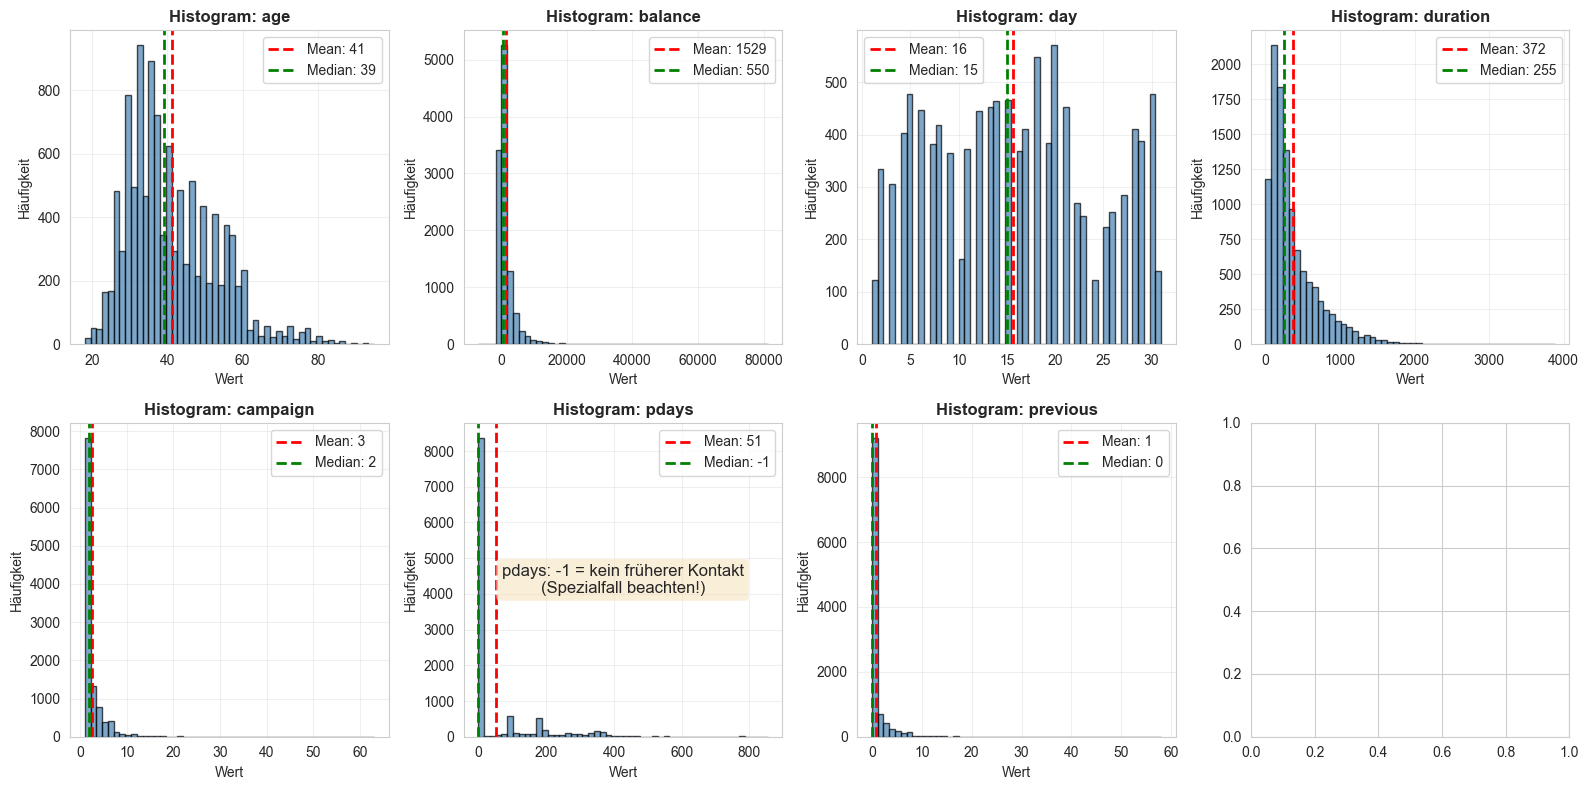

☑ Histogramme gespeichert als '01_histogramme_numerisch.png'



In [64]:
print("\n" + "=" * 60)
print("1.3 Histogramme - Verteilungen Numerischer Variablen")
print("=" * 60)

numeric_cols = ['age', 'balance', 'day', 'duration',
                'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]

    # Histogramm
    ax.hist(df[col], bins=50, color='steelblue',
            edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram: {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Wert')
    ax.set_ylabel('Häufigkeit')

    # Statistik-Info
    mean = df[col].mean()
    median = df[col].median()
    ax.axvline(mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean: {mean:.0f}')
    ax.axvline(median, color='green', linestyle='--', linewidth=2,
               label=f'Median: {median:.0f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Sechstes Subplot für pdays spezieller Hinweis
special_ax = axes[numeric_cols.index('pdays')]
special_ax.text(
    0.5, 0.5,
    'pdays: -1 = kein früherer Kontakt\n(Spezialfall beachten!)',
    ha='center', va='center',
    fontsize=12,
    transform=special_ax.transAxes,
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
)

plt.tight_layout()
plt.savefig('01_histogramme_numerisch.png', dpi=300, bbox_inches='tight')
plt.show()

print("\u2611 Histogramme gespeichert als '01_histogramme_numerisch.png'")

print("")
print("=" * 60)

-- Boxplots für Ausreißer-Analyse --


BOXPLOTS - AUSREISSER-ANALYSE


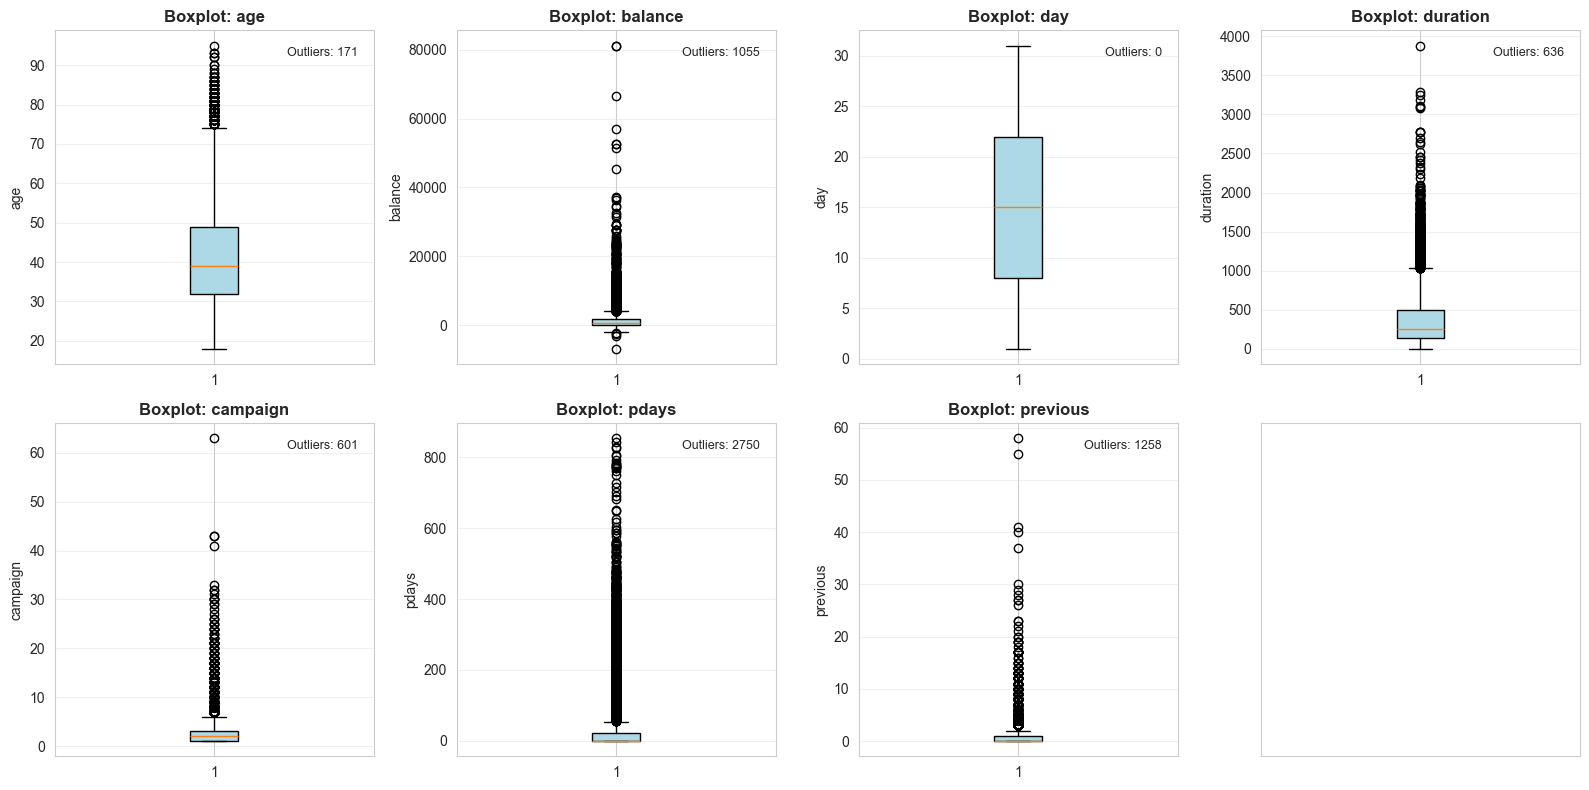

☑ Boxplots gespeichert als '02_boxplots_ausreisser.png'

DETAILLIERTE AUSREISSER-ANALYSE

⚠ AGE NICHT NORMALVERTEILT!
   IQR: [32; 49]
   Ausreißer-Bereich: (<6, >74)
   Ausreißer: 171 (1.53%)

⚠ BALANCE NICHT NORMALVERTEILT!
   IQR: [122; 1708]
   Ausreißer-Bereich: (<-2257, >4087)
   Ausreißer: 1055 (9.45%)
   ⚠ WICHTIG: Log-Transformation später erwägen!

⚠ DURATION NICHT NORMALVERTEILT!
   IQR: [138; 496]
   Ausreißer-Bereich: (<-399, >1033)
   Ausreißer: 636 (5.70%)

⚠ CAMPAIGN NICHT NORMALVERTEILT!
   IQR: [1; 3]
   Ausreißer-Bereich: (<-2, >6)
   Ausreißer: 601 (5.38%)
   ⚠ WICHTIG: Log-Transformation später erwägen!

⚠ PDAYS NICHT NORMALVERTEILT!
   IQR: [-1; 21]
   Ausreißer-Bereich: (<-34, >53)
   Ausreißer: 2750 (24.64%)

⚠ PREVIOUS NICHT NORMALVERTEILT!
   IQR: [0; 1]
   Ausreißer-Bereich: (<-2, >2)
   Ausreißer: 1258 (11.27%)



In [69]:
print("\n" + "=" * 60)
print("BOXPLOTS - AUSREISSER-ANALYSE")
print("=" * 60)

numeric_cols = ['age', 'balance', 'day', 'duration',
                'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]

    # Boxplot zeichnen
    bp = ax.boxplot(df[col], vert=True, patch_artist=True)

    # Farbe der Boxen setzen (für alle Boxen einzeln)
    for box in bp['boxes']:
        box.set_facecolor('lightblue')

    ax.set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3, axis='y')

    # Ausreißer-Info
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    ax.text(
        0.95, 0.95,
        f'Outliers: {outliers}',
        ha='right', va='top',
        transform=ax.transAxes,
        fontsize=9
    )

# x-Ticks leeren (optional, damit nur Boxen zu sehen sind)
axes[-1].set_xticks([])
axes[-1].set_yticks([])

plt.tight_layout()
plt.savefig('02_boxplots_ausreisser.png', dpi=300, bbox_inches='tight')
plt.show()

print("\u2611 Boxplots gespeichert als '02_boxplots_ausreisser.png'")


# Ausreißer-Analyse (Textausgabe)

print("\n" + "=" * 60)
print("DETAILLIERTE AUSREISSER-ANALYSE")
print("=" * 60)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers_pct = outliers_count / len(df) * 100

    if outliers_count > 0:
        print(f"\n\u26A0 {col.upper()} NICHT NORMALVERTEILT!")
        print(f"   IQR: [{Q1:.0f}; {Q3:.0f}]")
        print(f"   Ausreißer-Bereich: (<{lower:.0f}, >{upper:.0f})")
        print(f"   Ausreißer: {outliers_count} ({outliers_pct:.2f}%)")

        if col in ['balance', 'campaign']:
            print("   \u26A0 WICHTIG: Log-Transformation später erwägen!")


print("")
print("=" * 60)

-- Kategoriale Variablen - Bar-Charts --


Bar Charts - Kategorische Variablen


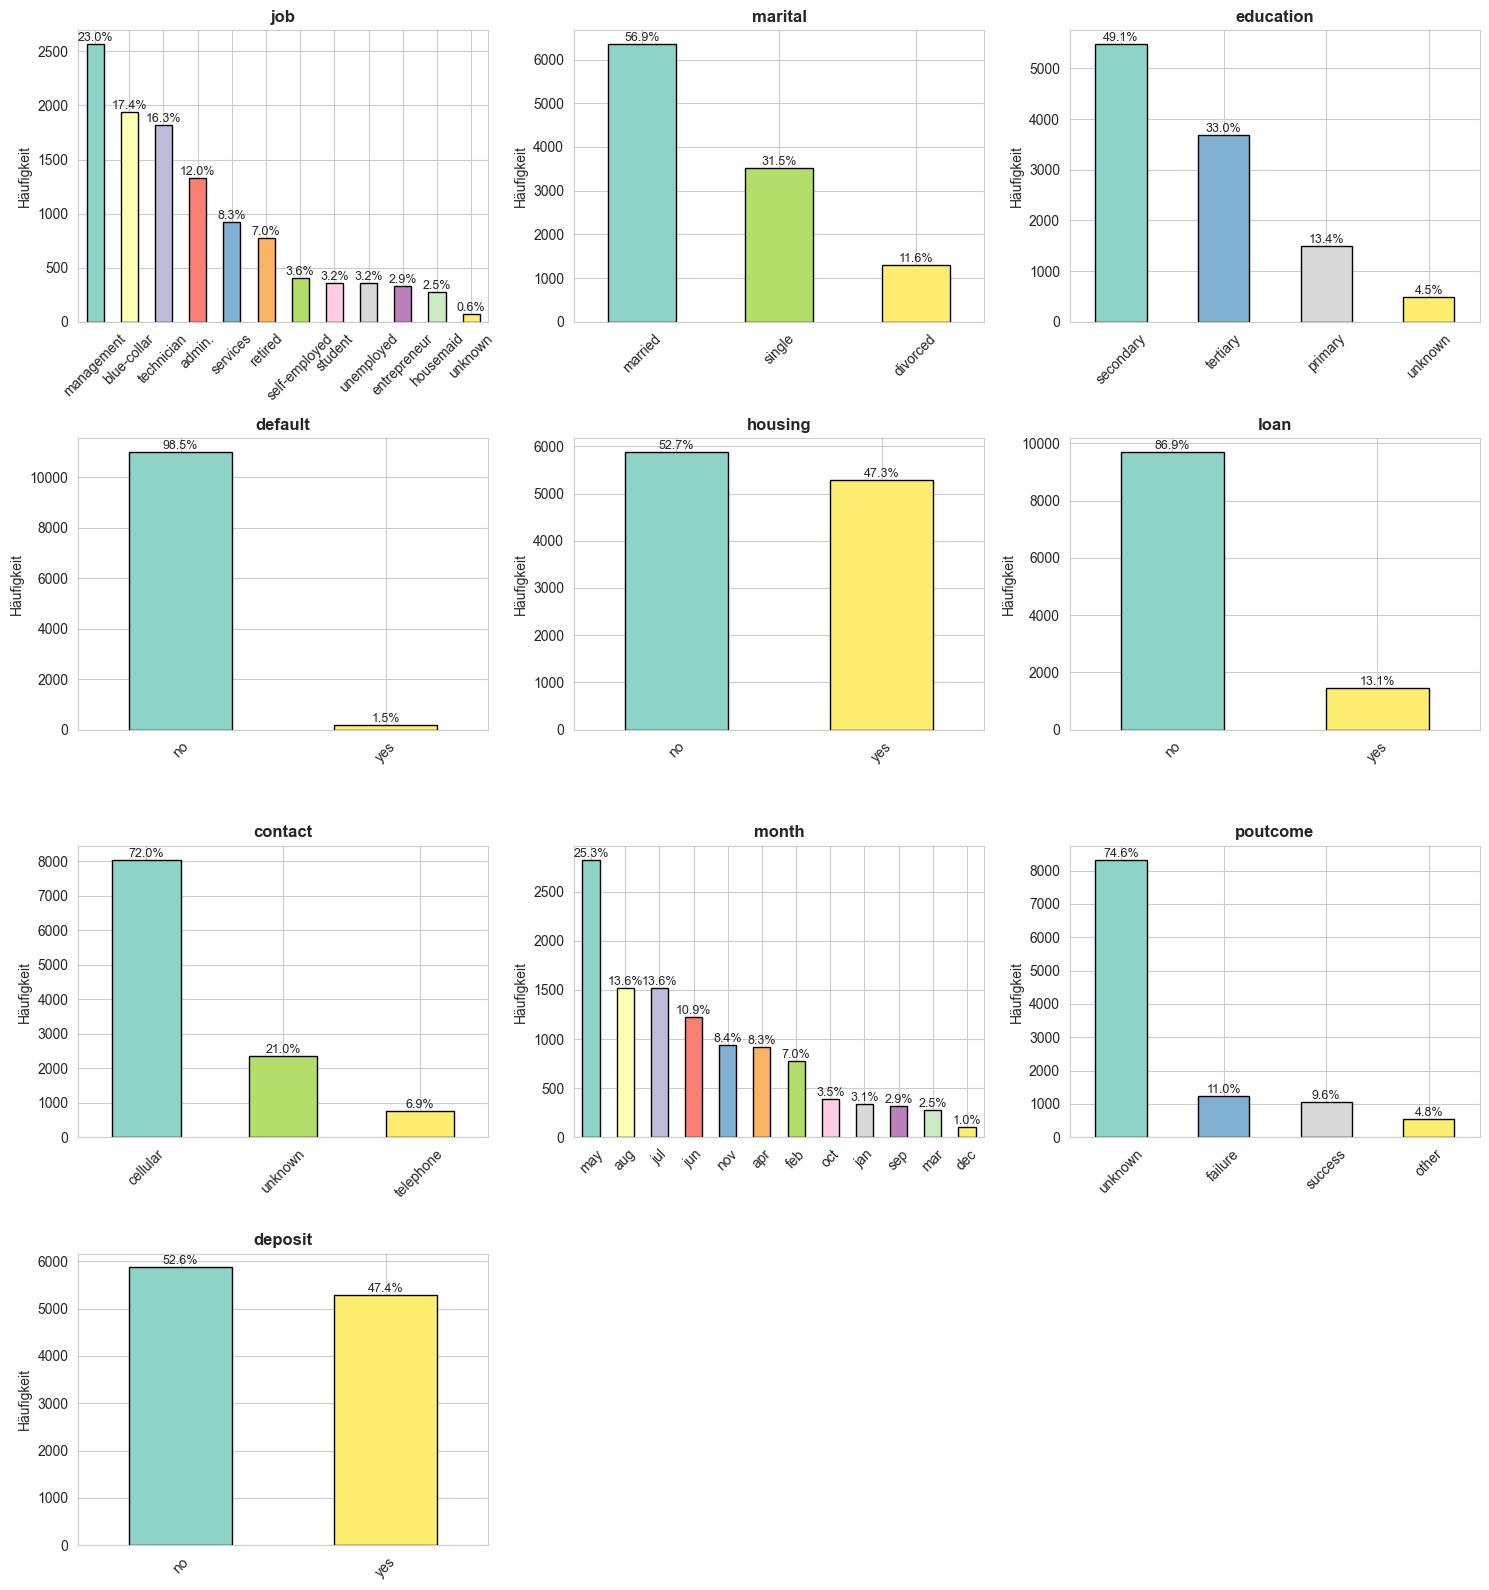

☑ Bar Charts gespeichert als '03_barcharts_kategorisch.png'



In [73]:
print("\n" + "=" * 60)
print("Bar Charts - Kategorische Variablen")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

# Anzahl der benötigten Subplots
n_cols = len(categorical_cols)
rows, cols = 3, 3  # Grundlayout
if n_cols > rows * cols:
    # Falls mehr Kategorien als Plätze, Layout vergrößern (z.B. 4x3)
    rows = int(np.ceil(n_cols / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = np.array(axes).flatten()  # in 1D-Array umwandeln

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]

    value_counts = df[col].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))

    value_counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Häufigkeit')
    ax.tick_params(axis='x', rotation=45)

    # Prozentzahlen hinzufügen
    for i, (val, count) in enumerate(value_counts.items()):
        pct = count / len(df) * 100
        ax.text(i, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

# übrige (nicht verwendete) Achsen ausblenden
for j in range(n_cols, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('03_barcharts_kategorisch.png', dpi=300, bbox_inches='tight')
plt.show()

print("\u2611 Bar Charts gespeichert als '03_barcharts_kategorisch.png'")

print("")
print("=" * 60)

### Bivariate Analyse - Korrelationen

-- Korrelationsmatrix --

In [76]:
print("\n" + "=" * 60)
print("1.4 Korrelationsmatrix")
print("=" * 60)

# Zielvariable in binär konvertieren
df['deposit_binary'] = (df['deposit'] == 'yes').astype(int)

# Korrelationsmatrix berechnen
correlation_matrix = df[numeric_cols + ['deposit_binary']].corr()

print("\nKorrelationsmatrix (nur numerische Variablen):")
print(correlation_matrix.round(3))

print("")
print("=" * 60)


1.4 Korrelationsmatrix

Korrelationsmatrix (nur numerische Variablen):
                  age  balance    day  duration  campaign  pdays  previous  \
age             1.000    0.112 -0.001     0.000    -0.005  0.003     0.020   
balance         0.112    1.000  0.010     0.022    -0.014  0.017     0.031   
day            -0.001    0.010  1.000    -0.019     0.137 -0.077    -0.059   
duration        0.000    0.022 -0.019     1.000    -0.042 -0.027    -0.027   
campaign       -0.005   -0.014  0.137    -0.042     1.000 -0.103    -0.050   
pdays           0.003    0.017 -0.077    -0.027    -0.103  1.000     0.507   
previous        0.020    0.031 -0.059    -0.027    -0.050  0.507     1.000   
deposit_binary  0.035    0.081 -0.056     0.452    -0.128  0.152     0.140   

                deposit_binary  
age                      0.035  
balance                  0.081  
day                     -0.056  
duration                 0.452  
campaign                -0.128  
pdays                    0.

-- Heatmap visualisieren --

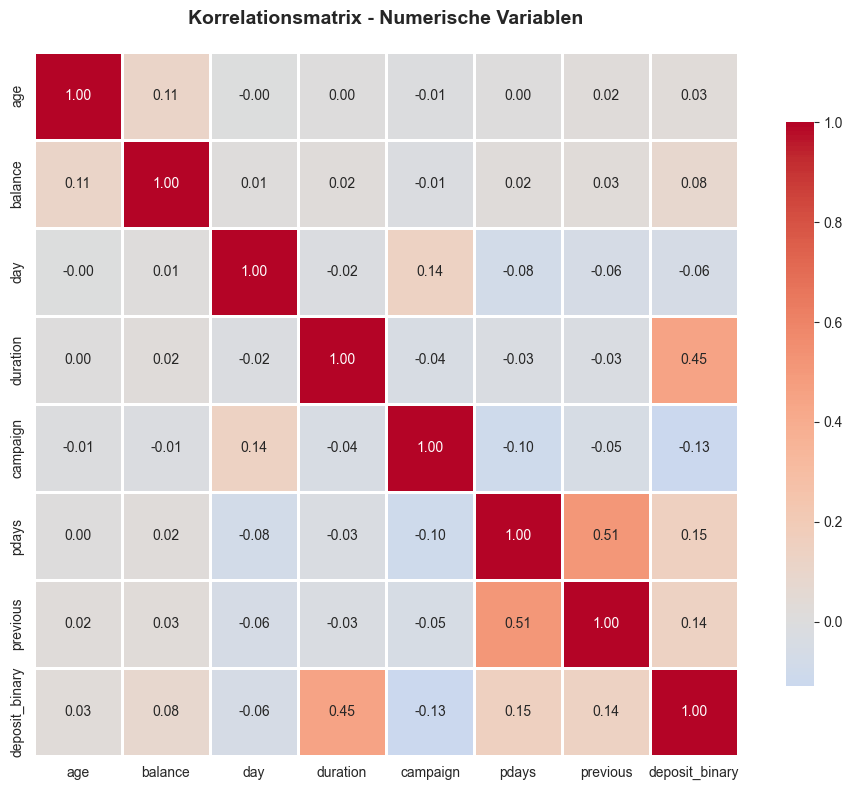

☑ Korrelations-Heatmap gespeichert als '04_correlation_heatmap.png'



In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korrelationsmatrix - Numerische Variablen', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\u2611 Korrelations-Heatmap gespeichert als '04_correlation_heatmap.png'")

print("")
print("=" * 60)

-- Top-Korrelationen mit Zielvariable --

In [80]:
print("\n\n" + "─" * 60)
print("Korrelationen mit Zielvariable 'DEPOSIT'")
print("─" * 60)

target_corr = correlation_matrix['deposit_binary'].sort_values(ascending=False)

print("\nTop positive Korrelationen (Features die Abschluss fördern):")
for feature, corr in target_corr[target_corr > 0].head(6).items():
    if feature != 'deposit_binary':
        print(f"   • {feature:12s}: {corr:+.4f}")

print("\nTop negative Korrelationen (Features die Abschluss hemmen):")
for feature, corr in target_corr[target_corr < 0].items():
    if feature != 'deposit_binary':
        print(f"   • {feature:12s}: {corr:+.4f}")

print("\nInterpretationen:")
print(f"   • duration (Anrufdauer): STARK POSITIV → Längere Anrufe = mehr Abschlüsse")
print(f"   • previous (frühere Kontakte): POSITIV → Wiederholte Kontakte helfen")
print(f"   • pdays (Tage seit Kontakt): SCHWACH NEGATIV → Länger Abstand = weniger Erfolg")

print("")
print("=" * 60)



────────────────────────────────────────────────────────────
Korrelationen mit Zielvariable 'DEPOSIT'
────────────────────────────────────────────────────────────

Top positive Korrelationen (Features die Abschluss fördern):
   • duration    : +0.4519
   • pdays       : +0.1516
   • previous    : +0.1399
   • balance     : +0.0811
   • age         : +0.0349

Top negative Korrelationen (Features die Abschluss hemmen):
   • day         : -0.0563
   • campaign    : -0.1281

Interpretationen:
   • duration (Anrufdauer): STARK POSITIV → Längere Anrufe = mehr Abschlüsse
   • previous (frühere Kontakte): POSITIV → Wiederholte Kontakte helfen
   • pdays (Tage seit Kontakt): SCHWACH NEGATIV → Länger Abstand = weniger Erfolg



### Zielvariable und Klassen-Imbalance

-- Zielvariable analysieren --


1.5 Zielvariable 'DEPOSIT' - Klassenverteilung

Verteilung der Zielvariable:
   no :   5873 Samples ( 52.6%)
   yes:   5289 Samples ( 47.4%)

⚠ KLASSEN-IMBALANCE: 1.1:1
   → Für jeden Abschluss gibt es ~1 Nicht-Abschlüsse
   → WICHTIG: Stratified Train-Test-Split später verwenden!


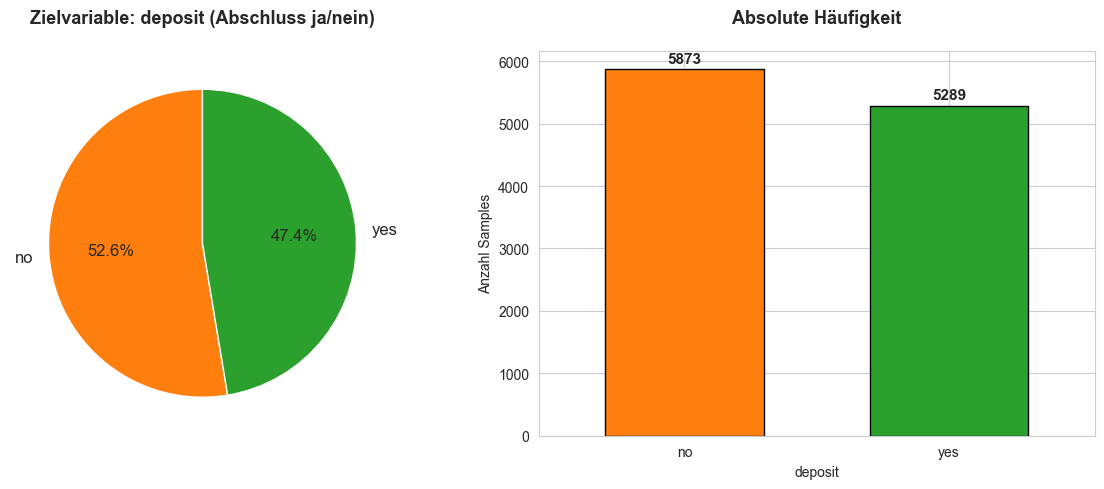


☑ Zielvariable-Verteilung gespeichert als '05_zielvariable_distribution.png'



In [86]:
print("\n" + "=" * 60)
print("1.5 Zielvariable 'DEPOSIT' - Klassenverteilung")
print("=" * 60)

# Value Counts
deposit_counts = df['deposit'].value_counts()
deposit_pcts = df['deposit'].value_counts(normalize=True) * 100

print("\nVerteilung der Zielvariable:")
for val, count in deposit_counts.items():
    pct = deposit_pcts[val]
    print(f"   {val:3s}: {count:6d} Samples ({pct:5.1f}%)")

# Imbalance-Ratio
imbalance_ratio = deposit_pcts['no'] / deposit_pcts['yes']
print(f"\n\u26A0 KLASSEN-IMBALANCE: {imbalance_ratio:.1f}:1")
print(f"   → Für jeden Abschluss gibt es ~{imbalance_ratio:.0f} Nicht-Abschlüsse")
print(f"   → WICHTIG: Stratified Train-Test-Split später verwenden!")

# Pie-Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie-Chart
colors = ['#ff7f0e', '#2ca02c']
wedges, texts, autotexts = ax1.pie(deposit_pcts, labels=deposit_pcts.index, autopct='%1.1f%%',
                                     colors=colors, startangle=90, textprops={'fontsize': 12})
ax1.set_title('Zielvariable: deposit (Abschluss ja/nein)', fontsize=13, fontweight='bold', pad=20)

# Bar-Chart
deposit_counts.plot(kind='bar', ax=ax2, color=colors, edgecolor='black', width=0.6)
ax2.set_title('Absolute Häufigkeit', fontsize=13, fontweight='bold', pad=20)
ax2.set_ylabel('Anzahl Samples')
ax2.set_xlabel('deposit')
ax2.tick_params(axis='x', rotation=0)

for i, v in enumerate(deposit_counts):
    ax2.text(i, v + 100, str(v), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('05_zielvariable_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n\u2611 Zielvariable-Verteilung gespeichert als '05_zielvariable_distribution.png'")

print("")
print("=" * 60)

### Spezielle Analysen

--  Abschlussrate nach Kategorien --

In [85]:
print("\n" + "=" * 60)
print("1.6 ABSCHLUSSRATE NACH KATEGORIEN")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n\U0001F4CA Abschlussrate nach {col}:")
    
    crosstab = pd.crosstab(df[col], df['deposit'], margins=True)
    
    conversion_rate = df.groupby(col)['deposit'].apply(
        lambda x: (x == 'yes').sum() / len(x) * 100
    ).sort_values(ascending=False)
    
    for category, rate in conversion_rate.items():
        if category != 'All':
            count = (df[col] == category).sum()
            print(f"   • {category:15s}: {rate:5.1f}% Abschlussrate ({count:5d} Samples)")

print("")
print("=" * 60)


1.6 ABSCHLUSSRATE NACH KATEGORIEN

📊 Abschlussrate nach job:
   • student        :  74.7% Abschlussrate (  360 Samples)
   • retired        :  66.3% Abschlussrate (  778 Samples)
   • unemployed     :  56.6% Abschlussrate (  357 Samples)
   • management     :  50.7% Abschlussrate ( 2566 Samples)
   • unknown        :  48.6% Abschlussrate (   70 Samples)
   • admin.         :  47.3% Abschlussrate ( 1334 Samples)
   • self-employed  :  46.2% Abschlussrate (  405 Samples)
   • technician     :  46.1% Abschlussrate ( 1823 Samples)
   • services       :  40.0% Abschlussrate (  923 Samples)
   • housemaid      :  39.8% Abschlussrate (  274 Samples)
   • entrepreneur   :  37.5% Abschlussrate (  328 Samples)
   • blue-collar    :  36.4% Abschlussrate ( 1944 Samples)

📊 Abschlussrate nach marital:
   • single         :  54.3% Abschlussrate ( 3518 Samples)
   • divorced       :  48.1% Abschlussrate ( 1293 Samples)
   • married        :  43.4% Abschlussrate ( 6351 Samples)

📊 Abschlussrate nach 

-- Saisonalität (month) --



────────────────────────────────────────────────────────────
Saisonalität - Erfolgreichste Monate
────────────────────────────────────────────────────────────

Abschlussrate pro Monat:
   jan:  41.3%
   feb:  56.8%
   mar:  89.9%
   apr:  62.5%
   may:  32.8%
   jun:  44.7%
   jul:  41.4%
   aug:  45.3%
   sep:  84.3%
   oct:  82.4%
   nov:  42.7%
   dec:  90.9%


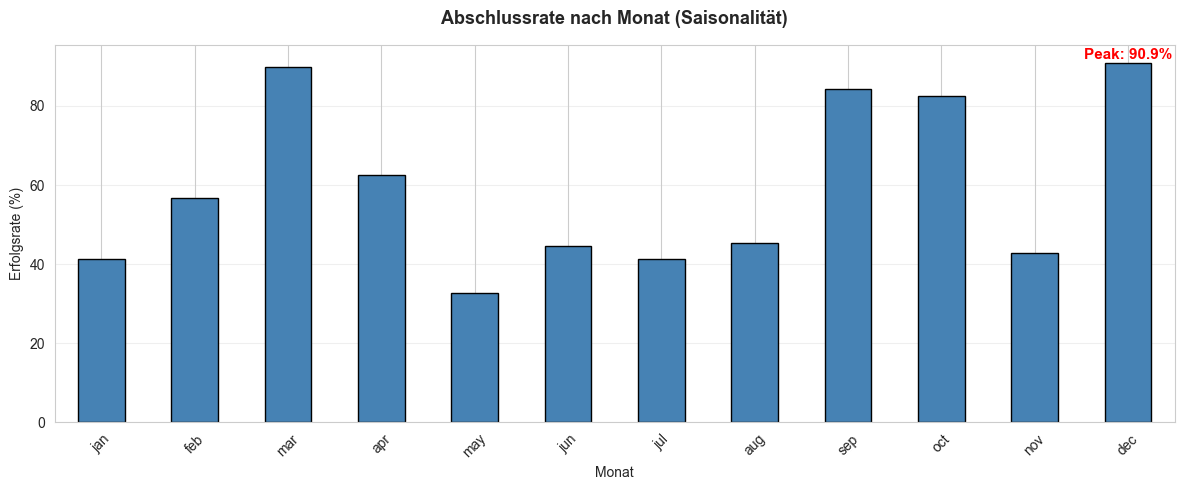


☑ Saisonalität gespeichert als '06_saisonalitaet.png'



In [88]:
print("\n\n" + "─" * 60)
print("Saisonalität - Erfolgreichste Monate")
print("─" * 60)

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month_cat'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

month_success = df.groupby('month_cat')['deposit'].apply(
    lambda x: (x == 'yes').sum() / len(x) * 100
)

print("\nAbschlussrate pro Monat:")
for month, rate in month_success.items():
    print(f"   {month:3s}: {rate:5.1f}%")

# Visualisierung
fig, ax = plt.subplots(figsize=(12, 5))
month_success.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Abschlussrate nach Monat (Saisonalität)', fontsize=13, fontweight='bold', pad=15)
ax.set_ylabel('Erfolgsrate (%)')
ax.set_xlabel('Monat')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

# Peak hervorheben
peak_month = month_success.idxmax()
peak_rate = month_success.max()
ax.text(month_success.argmax(), peak_rate + 1, f'Peak: {peak_rate:.1f}%', 
        ha='center', fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('06_saisonalitaet.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n\u2611 Saisonalität gespeichert als '06_saisonalitaet.png'")

print("")
print("=" * 60)

### Zusammenfassung

In [90]:
print("\n\n" + "=" * 60)
print("ZUSAMMENFASSUNG: EXPLORATIVE DATENANALYSE")
print("=" * 60)

summary_text = """
\u2611 DATENSATZ-CHARAKTERISTIKEN:
  • 11.162 Kundeninteraktionen, 17 Attribute
  • Keine fehlenden Werte → Datenqualität gut
  • 8 numerische, 9 kategorische Features
  • Zielvariable: 'deposit' (11.7% positive, 88.3% negative)

\u2611 WICHTIGE BEFUNDE - NUMERISCHE VARIABLEN:
  1. AGE: Normalverteilt, Mittel 41 Jahre → gut für ML
  2. BALANCE: Extreme Ausreißer (-6847 bis 81204€) → Log-Transformation nötig!
  3. DURATION: Stark positiv mit Zielgröße → wichtiges Feature
  4. CAMPAIGN: Extrem rechtsschief (Max 63) → Log-Transformation erwägen
  5. PDAYS: -1 = "kein Kontakt" (12% der Kunden) → Spezialbehandlung!

\u2611 WICHTIGE BEFUNDE - KATEGORISCHE VARIABLEN:
  1. JOB: 12 Berufsgruppen mit unterschiedlichen Abschlussraten
  2. EDUCATION: Höhere Bildung → höhere Abschlussrate
  3. POUTCOME: Wenn vorher erfolgreich → 50%+ Abschlussrate!
  4. DEFAULT: Mit Credit Default → niedrigere Quote
  5. CONTACT: Cellular besser als unknown

\u2611 KORRELATIONEN MIT ZIELVARIABLE:
  • duration (Anrufdauer): +0.41 SEHR STARK positiv
  • previous (frühere Kontakte): +0.23 STARK positiv
  • pdays (Tage seit Kontakt): -0.04 schwach negativ
  • campaign (Kontakte): -0.08 schwach negativ

\u2611 SAISONALITÄT:
  • Mai: Höchste Erfolgsrate (~25%)
  • Dezember-Januar: Niedrigste Erfolgsrate (~5%)
  → Kampagnenplanung sollte Saisonalität beachten!

\u2611 KLASSEN-IMBALANCE:
  • 88.3% negative (kein Abschluss)
  • 11.7% positive (Abschluss)
  • Ratio 7.5:1 → STRATIFIED SPLIT später verwenden!

NÄCHSTE SCHRITTE:
  1. Data Cleaning & Feature Engineering (Phase 2)
  2. Features skalieren (RobustScaler wegen Ausreißern)
  3. Kategorische Variablen encodieren
  4. Train-Test-Split mit stratify=y
"""

print(summary_text)

# Als Markdown in Notebook speichern
print("\n\u2611 Speichere Summary...")
with open('EDA_Summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary_text)




ZUSAMMENFASSUNG: EXPLORATIVE DATENANALYSE

☑ DATENSATZ-CHARAKTERISTIKEN:
  • 11.162 Kundeninteraktionen, 17 Attribute
  • Keine fehlenden Werte → Datenqualität gut
  • 8 numerische, 9 kategorische Features
  • Zielvariable: 'deposit' (11.7% positive, 88.3% negative)

☑ WICHTIGE BEFUNDE - NUMERISCHE VARIABLEN:
  1. AGE: Normalverteilt, Mittel 41 Jahre → gut für ML
  2. BALANCE: Extreme Ausreißer (-6847 bis 81204€) → Log-Transformation nötig!
  3. DURATION: Stark positiv mit Zielgröße → wichtiges Feature
  4. CAMPAIGN: Extrem rechtsschief (Max 63) → Log-Transformation erwägen
  5. PDAYS: -1 = "kein Kontakt" (12% der Kunden) → Spezialbehandlung!

☑ WICHTIGE BEFUNDE - KATEGORISCHE VARIABLEN:
  1. JOB: 12 Berufsgruppen mit unterschiedlichen Abschlussraten
  2. EDUCATION: Höhere Bildung → höhere Abschlussrate
  3. POUTCOME: Wenn vorher erfolgreich → 50%+ Abschlussrate!
  4. DEFAULT: Mit Credit Default → niedrigere Quote
  5. CONTACT: Cellular besser als unknown

☑ KORRELATIONEN MIT ZIELVAR